# IT'S ABOUT TIME (AND ICE CREAM)
**_Enough with car prices already, I'm hungry_**
### Data Science 410 BB
#### University of Washington Professional & Continuing Education
#### Homework 8: Time Series Analysis
#### Leo Salemann, 3/1/18


# Fixin' to Get Ready

## Helper Functions

In [123]:
## Decomposition of the time series into components
## From IntroToTime Series, Stephen Elston, UW Data Science 350, ca. 2/28/18
ts.decomp <- function(df, col = 'elec.ts', span = 0.5, Mult = TRUE, is.df = TRUE){
  # if(Mult) temp = log(df[, col])  else temp = ts(df[, col]
  if(is.df) temp = log(df[, col])  
  else temp = df
  spans = span * length(temp)  
  fit <- stl(temp, s.window = "periodic", t.window = spans)
  plot(fit, main = paste('Decompositon of',col,'with lowess span = ', as.character(span)))
  fit$time.series
}

In [124]:
## From IntroToTime Series, Stephen Elston, UW Data Science 350, ca. 2/28/18
plot.acf <- function(df, col = 'remainder', is.df =TRUE){
  if(is.df) temp <- df[, col]
  else temp <- df
  par(mfrow = c(2,1))
  acf(temp, main = paste('ACF of', col))
  pacf(temp, main = paste('PACF of', col))
  par(mfrow = c(1,1))
}

In [125]:
## From IntroToTime Series, Stephen Elston, UW Data Science 350, ca. 2/28/18
ts.diff <- function(ts, lag = 1){
  diff(ts, lag = lag)
}

In [126]:
## From IntroToTime Series, Stephen Elston, UW Data Science 350, ca. 2/28/18
dist.ts = function(df, col = 'residual', bins = 40){
  par(mfrow = c(1,2))
  temp = as.vector(df)
  breaks = seq(min(temp), max(temp), length.out = (bins + 1))
  hist(temp, breaks = breaks, main = paste('Distribution of ', col), xlab = col)
  qqnorm(temp, main = paste('Normal Q-Q plot of ', col))
  par(mfrow = c(1,1))
}

In [147]:
## Function for ARIMA model estimation
## From IntroToTime Series, Stephen Elston, UW Data Science 350, ca. 2/28/18
ts.model = function(ts, col = 'remainder', order = c(0,0,1)){
  mod = arima(ts, order = order, include.mean = FALSE)
  print(mod)
  mod
}
mod.est = ts.model(arMod, col = 'AR(1) process', order = c(1,0,0))
plot.acf(mod.est$resid[-1], col = 'AR(1) estimate', is.df = F)

ERROR: Error in NCOL(x): object 'arMod' not found


## Load Data, Peek at Some Rows

In [127]:
getwd()
Dairy = read.table('CADairyProduction.csv', sep =",", header = TRUE)
head(Dairy)
tail(Dairy)

[1] "/home/vagrant/git/UW_DataScience/Q2/HW08"

Year,Month,Cotagecheese.Prod,Icecream.Prod,Milk.Prod,N.CA.Fat.Price,Month.Count,monthNumSqred,monthNumCubed
1995,Jan,4.370,51.595,2.112,0.9803,1,1,1
1995,Feb,3.695,56.086,1.932,0.8924,2,4,8
1995,Mar,4.538,68.453,2.162,0.8924,3,9,27
1995,Apr,4.280,65.722,2.130,0.8967,4,16,64
1995,May,4.470,73.730,2.227,0.8967,5,25,125
1995,Jun,4.238,77.994,2.124,0.9160,6,36,216


,Year,Month,Cotagecheese.Prod,Icecream.Prod,Milk.Prod,N.CA.Fat.Price,Month.Count,monthNumSqred,monthNumCubed
223,2013,Jul,2.433,84.026,3.373,1.6923,223,49729,11089567
224,2013,Aug,2.169,78.382,3.400,1.6273,224,50176,11239424
225,2013,Sep,2.193,74.871,3.197,1.5519,225,50625,11390625
226,2013,Oct,2.284,70.011,3.338,1.5566,226,51076,11543176
227,2013,Nov,1.865,61.394,3.275,1.7537,227,51529,11697083
228,2013,Dec,2.345,53.653,3.473,1.6747,228,51984,11852352


**Data is monthly, runs from Jan 1995 to Dec 2013**

In [128]:
cat(2013-1994 , " years\n")
cat(12*(2013-1994), "months")

19  years
228 months

# Sationary & Seasonality

##  First Look

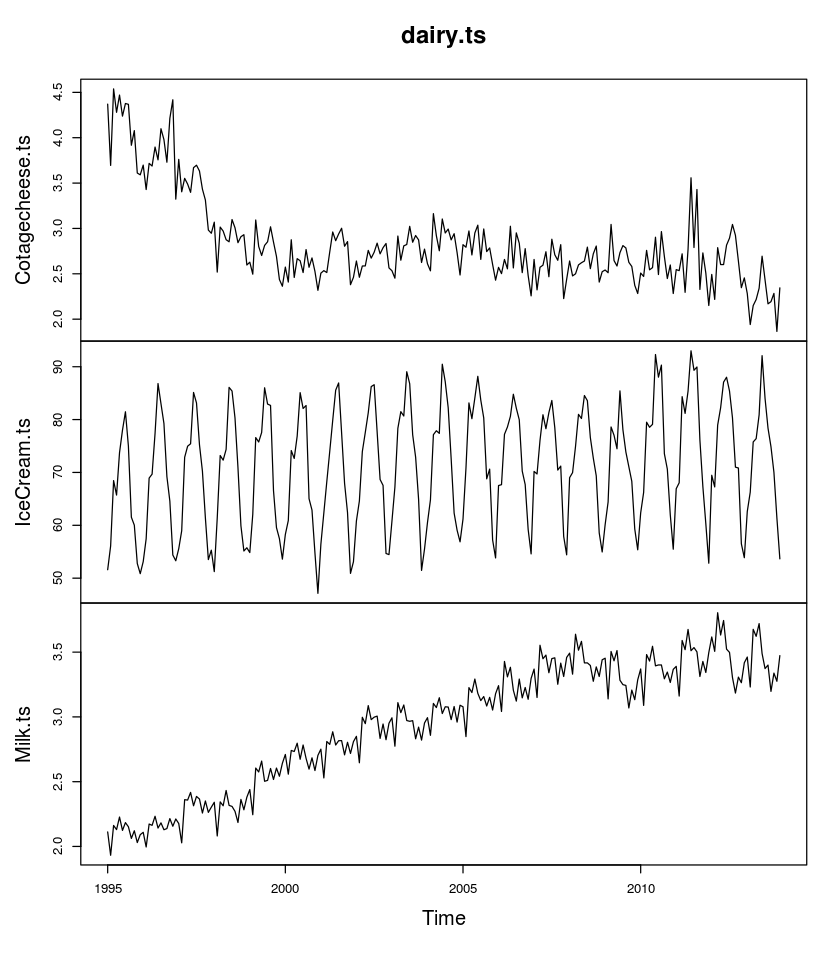

In [129]:
Cotagecheese.ts = ts(Dairy[,3], start = 1995, freq = 12)
IceCream.ts     = ts(Dairy[,4], start = 1995, freq = 12)
Milk.ts         = ts(Dairy[,5], start = 1995, freq = 12)

dairy.ts = cbind(Cotagecheese.ts, IceCream.ts, Milk.ts)
options(repr.pmales.extlot.width=8, repr.plot.height=8)
plot(dairy.ts)

- ** Strong seasonal component in Ice Cream**
- ** Potential seasonal components in Milk and Cottage Cheese, along with nonseasonal/multi-yar trends**
- ** Strong trends in Milk and Cottage Cheese; potential trend in Ice Cream.**

### So far, it's ..

|Series        |Sationary? |Seasonal?   |
|--------------|----------:|:-----------|
|Cottage Cheese|No way     |Could be    |
|Ice Cream     |Could be   |Pretty sure |
|Milk          |No way     |Could be    |

# Decompose & Dive Deeper

## Separate Time Series into Seasonal, Trend, Residual Components

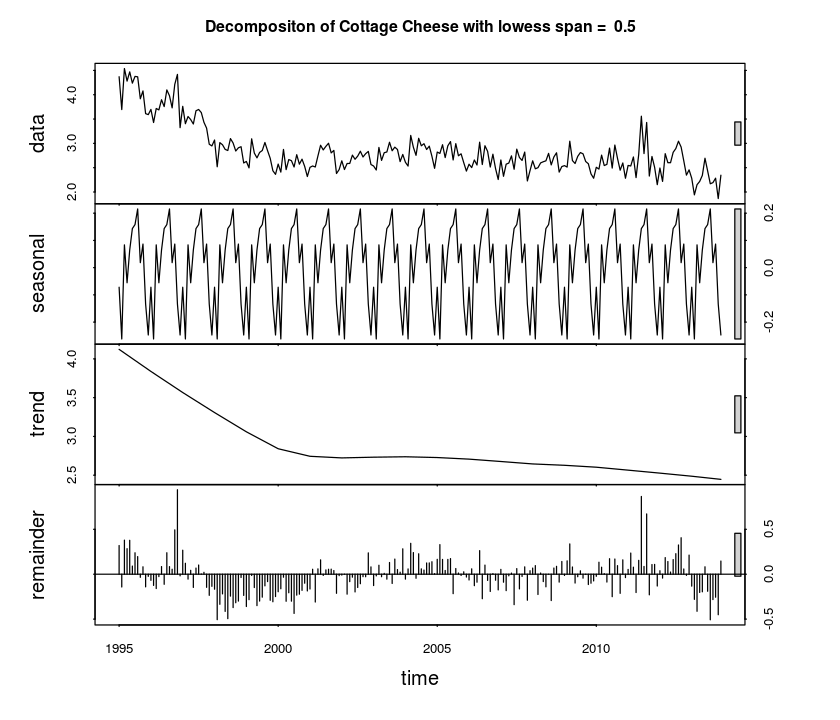

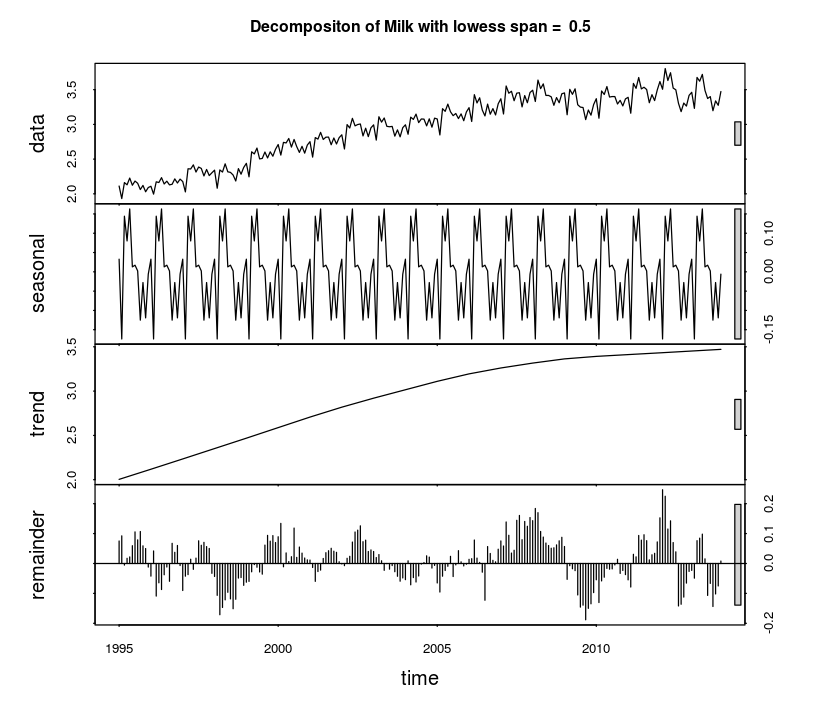

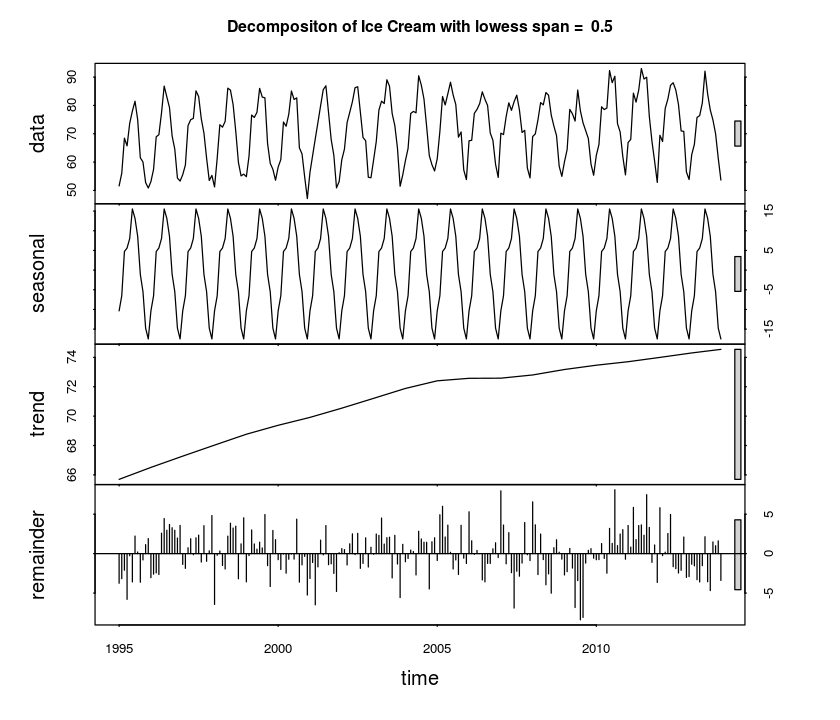

In [130]:
options(repr.pmales.extlot.width=2, repr.plot.height=6)
# par(mfrow=c(3,3))
Cotagecheese.decomp = ts.decomp(Cotagecheese.ts, col= "Cottage Cheese", 
                                Mult = TRUE, is.df = FALSE)
Milk.decomp = ts.decomp(Milk.ts, col= "Milk", 
                        Mult = TRUE, is.df = FALSE)
IceCream.decomp = ts.decomp(IceCream.ts, col= "Ice Cream", 
                            Mult = TRUE, is.df = FALSE)
# par(mfrow=c(1,1))

- **Strong trend component in all 3, can't be stationary. **
- **Seasonal component very clean for Ice Cream; a bit noisy for Milk & Cotage Cheese**

### So now, it's ..

|Series        |Sationary? |Seasonal?   |
|--------------|----------:|:-----------|
|Cottage Cheese|No way     |Pretty sure |
|Ice Cream     |No way     |Pretty sure |
|Milk          |No way     |Pretty sure |

## Check out the Autocorrelation (ACF/PACF)
_The evidence is pretty strong that the data's not staionary, but I already wrote the code in my draft notebook, so what the heck ..._

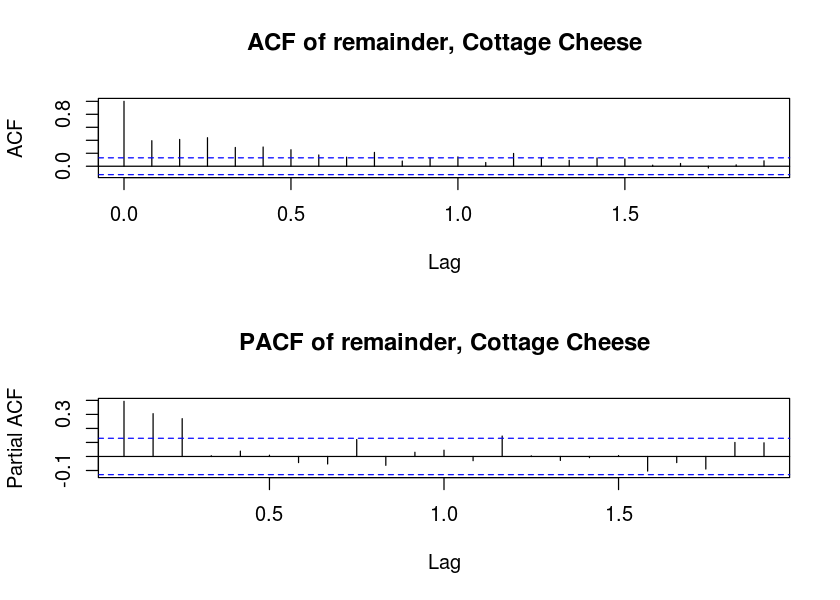

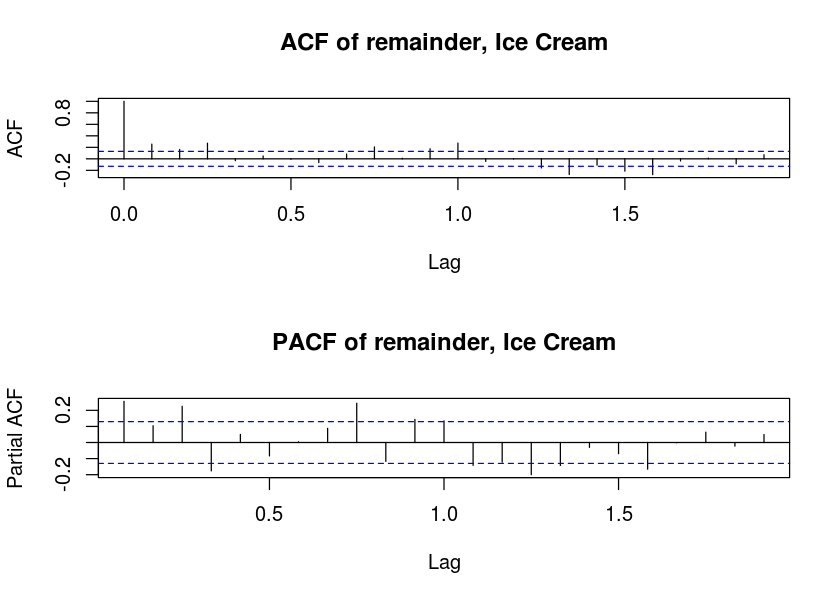

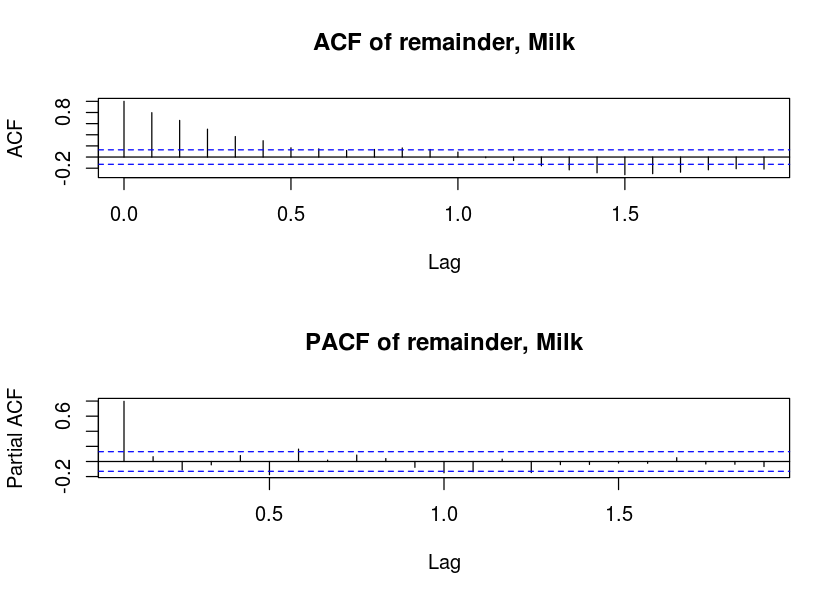

In [145]:
options(repr.pmales.extlot.width=8, repr.plot.height=5)
plot.acf(Cotagecheese.decomp[, 3], col = "remainder, Cottage Cheese", is.df = FALSE)
plot.acf(IceCream.decomp[, 3], col = "remainder, Ice Cream", is.df = FALSE)
plot.acf(Milk.decomp[, 3], col = "remainder, Milk", is.df = FALSE)

- **ACF crosses the 95% confidence interval for multiple lags, for all three products    **
- **PACF crosses the 95% confidence interval for more than one lags, for all three products  **
- **All three products are non-stationary**

### So now, it's ..

|Series        |Sationary? |Seasonal?   |
|--------------|----------:|:-----------|
|Cottage Cheese|No     |Yes |
|Ice Cream     |No     |Yes |
|Milk          |No     |Yes |

# ARIMA Analysis

## ARIMA, Cottage Cheese

In [172]:
cat('\n----------< order = c(0,0,0) >-----------------------')
Cotagecheese.arima = ts.model(Cotagecheese.decomp[, 3], 
                              col = 'ARIMA model for Cottage Cheese', order = c(0,0,0))

cat('\n----------< order = c(0,1,0) >-----------------------')
Cotagecheese.arima = ts.model(Cotagecheese.decomp[, 3], 
                              col = 'ARIMA model for Cottage Cheese', order = c(0,1,0))

cat('\n----------< order = c(0,0,1) >-----------------------')
Cotagecheese.arima = ts.model(Cotagecheese.decomp[, 3], 
                              col = 'ARIMA model for Cottage Cheese', order = c(0,0,1))


----------< order = c(0,0,0) >-----------------------
Call:
arima(x = ts, order = order, include.mean = FALSE)


sigma^2 estimated as 0.04414:  log likelihood = 32.22,  aic = -62.44

----------< order = c(0,1,0) >-----------------------
Call:
arima(x = ts, order = order, include.mean = FALSE)


sigma^2 estimated as 0.0526:  log likelihood = 12.17,  aic = -22.33

----------< order = c(0,0,1) >-----------------------
Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
         ma1
      0.2877
s.e.  0.0570

sigma^2 estimated as 0.0394:  log likelihood = 45.1,  aic = -86.2


In [173]:
cat('\n----------< order = c(0,0,1) >-----------------------')
Cotagecheese.arima = ts.model(Cotagecheese.decomp[, 3], 
                              col = 'ARIMA model for Cottage Cheese', order = c(0,0,1))

cat('\n----------< order = c(0,1,1) >-----------------------')
Cotagecheese.arima = ts.model(Cotagecheese.decomp[, 3], 
                              col = 'ARIMA model for Cottage Cheese', order = c(0,1,1))

cat('\n----------< order = c(1,1,1) >-----------------------')
Cotagecheese.arima = ts.model(Cotagecheese.decomp[, 3], 
                              col = 'ARIMA model for Cottage Cheese', order = c(1,1,1))


----------< order = c(0,0,1) >-----------------------
Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
         ma1
      0.2877
s.e.  0.0570

sigma^2 estimated as 0.0394:  log likelihood = 45.1,  aic = -86.2

----------< order = c(0,1,1) >-----------------------
Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
          ma1
      -0.7401
s.e.   0.0482

sigma^2 estimated as 0.0328:  log likelihood = 65.38,  aic = -126.76

----------< order = c(1,1,1) >-----------------------
Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
          ar1      ma1
      -0.1122  -0.6751
s.e.   0.1013   0.0817

sigma^2 estimated as 0.03263:  log likelihood = 65.97,  aic = -125.94


In [174]:
cat('\n----------< order = c(1,1,0) >-----------------------')
Cotagecheese.arima = ts.model(Cotagecheese.decomp[, 3], 
                              col = 'ARIMA model for Cottage Cheese', order = c(0,1,1))

cat('\n----------< order = c(0,2,1) >-----------------------')
Cotagecheese.arima = ts.model(Cotagecheese.decomp[, 3], 
                              col = 'ARIMA model for Cottage Cheese', order = c(0,2,1))

cat('\n----------< order = c(0,1,2) >-----------------------')
Cotagecheese.arima = ts.model(Cotagecheese.decomp[, 3], 
                              col = 'ARIMA model for Cottage Cheese', order = c(0,1,2))

cat('\n----------< order = c(0,2,2) >-----------------------')
Cotagecheese.arima = ts.model(Cotagecheese.decomp[, 3], 
                              col = 'ARIMA model for Cottage Cheese', order = c(0,2,2))


----------< order = c(1,1,0) >-----------------------
Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
          ma1
      -0.7401
s.e.   0.0482

sigma^2 estimated as 0.0328:  log likelihood = 65.38,  aic = -126.76

----------< order = c(0,2,1) >-----------------------
Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
          ma1
      -1.0000
s.e.   0.0111

sigma^2 estimated as 0.05283:  log likelihood = 8.9,  aic = -13.81

----------< order = c(0,1,2) >-----------------------
Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
          ma1     ma2
      -0.7874  0.0875
s.e.   0.0658  0.0781

sigma^2 estimated as 0.03262:  log likelihood = 66,  aic = -125.99

----------< order = c(0,2,2) >-----------------------
Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
          ma1     ma2
      -1.7334  0.7334
s.e.   0.0515  0.0504

sigma^2 estimated as 0.03291:  log likelihood = 60.69,  aic = -115.38

## Seems the best is c*(1,1,0) based on AIC

# 12 Month Forecast

## Cottage Cheese

In [182]:
require(forecast)
fit.CotageCheese = auto.arima(Cotagecheese.ts, max.p=3, max.q=3,
                       max.P=2, max.Q=2, max.order=5, max.d=2, max.D=1,
                       start.p=0, start.q=0, start.P=0, start.Q=0)
summary(fit.CotageCheese)

Series: Cotagecheese.ts 
ARIMA(1,1,2)(2,0,1)[12] 

Coefficients:
         ar1      ma1     ma2     sar1    sar2    sma1
      0.8053  -1.4761  0.5261  -0.1262  0.4643  0.5205
s.e.  0.2018   0.2133  0.1602   0.3784  0.1518  0.4224

sigma^2 estimated as 0.04474:  log likelihood=30.7
AIC=-47.39   AICc=-46.88   BIC=-23.42

Training set error measures:
                      ME      RMSE      MAE        MPE     MAPE      MASE
Training set -0.01665623 0.2082455 0.152456 -0.9631341 5.442136 0.6524637
                    ACF1
Training set -0.05994719



Forecast method: ARIMA(1,1,2)(2,0,1)[12]

Model Information:
Series: Cotagecheese.ts 
ARIMA(1,1,2)(2,0,1)[12] 

Coefficients:
         ar1      ma1     ma2     sar1    sar2    sma1
      0.8053  -1.4761  0.5261  -0.1262  0.4643  0.5205
s.e.  0.2018   0.2133  0.1602   0.3784  0.1518  0.4224

sigma^2 estimated as 0.04474:  log likelihood=30.7
AIC=-47.39   AICc=-46.88   BIC=-23.42

Error measures:
                      ME      RMSE      MAE        MPE     MAPE      MASE
Training set -0.01665623 0.2082455 0.152456 -0.9631341 5.442136 0.6524637
                    ACF1
Training set -0.05994719

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2014       2.112976 1.841905 2.384047 1.698408 2.527543
Feb 2014       1.908666 1.623280 2.194052 1.472206 2.345126
Mar 2014       2.114752 1.816853 2.412652 1.659155 2.570350
Apr 2014       2.152338 1.843263 2.461412 1.679649 2.625027
May 2014       2.142365 1.823133 2.461596 1.654142 2.630587
Jun 2014       2.250635 1.92203

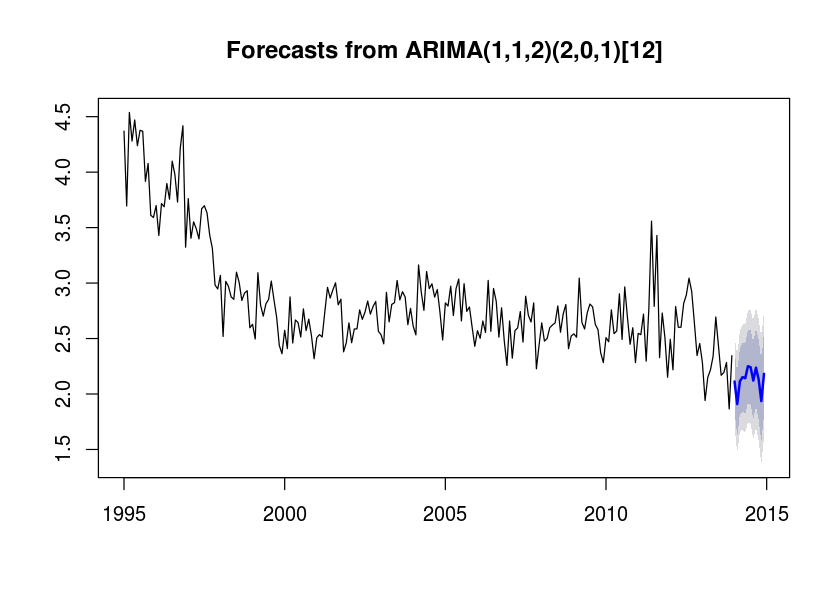

In [183]:
## Make the forecast for the next year
CotageCheese.forecast = forecast(fit.CotageCheese, h=12)
summary(CotageCheese.forecast)
plot(CotageCheese.forecast)

## Ice Cream

In [184]:
require(forecast)
fit.IceCream = auto.arima(IceCream.ts, max.p=3, max.q=3,
                       max.P=2, max.Q=2, max.order=5, max.d=2, max.D=1,
                       start.p=0, start.q=0, start.P=0, start.Q=0)
summary(fit.IceCream )

Series: IceCream.ts 
ARIMA(3,0,1)(1,1,2)[12] with drift 

Coefficients:
          ar1     ar2     ar3     ma1   sar1     sma1     sma2   drift
      -0.3052  0.2177  0.3482  0.5655  0.026  -0.5470  -0.2335  0.0377
s.e.   0.2020  0.0879  0.0648  0.2203  0.224   0.2184   0.1523  0.0101

sigma^2 estimated as 7.711:  log likelihood=-528.05
AIC=1074.11   AICc=1074.98   BIC=1104.49

Training set error measures:
                     ME     RMSE      MAE        MPE     MAPE      MASE
Training set 0.09698592 2.652346 2.052637 0.05633781 2.892051 0.7436829
                     ACF1
Training set -0.005397973



Forecast method: ARIMA(3,0,1)(1,1,2)[12] with drift

Model Information:
Series: IceCream.ts 
ARIMA(3,0,1)(1,1,2)[12] with drift 

Coefficients:
          ar1     ar2     ar3     ma1   sar1     sma1     sma2   drift
      -0.3052  0.2177  0.3482  0.5655  0.026  -0.5470  -0.2335  0.0377
s.e.   0.2020  0.0879  0.0648  0.2203  0.224   0.2184   0.1523  0.0101

sigma^2 estimated as 7.711:  log likelihood=-528.05
AIC=1074.11   AICc=1074.98   BIC=1104.49

Error measures:
                     ME     RMSE      MAE        MPE     MAPE      MASE
Training set 0.09698592 2.652346 2.052637 0.05633781 2.892051 0.7436829
                     ACF1
Training set -0.005397973

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2014       63.62479 60.06560 67.18397 58.18148 69.06809
Feb 2014       68.89726 65.21948 72.57504 63.27258 74.52194
Mar 2014       77.71948 74.00891 81.43005 72.04465 83.39431
Apr 2014       79.58273 75.65412 83.51134 73.57444 85.59103
May 2014       82.28689

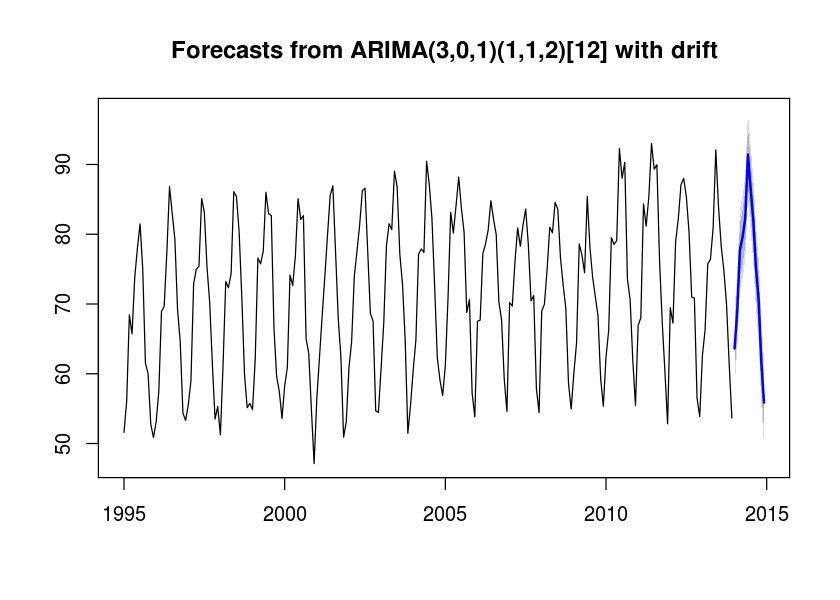

In [186]:
## Make the forecast for the next year
IceCream.forecast = forecast(fit.IceCream , h=12)
summary(IceCream.forecast)
plot(IceCream.forecast)

## Milk

In [187]:
require(forecast)
fit.Milk = auto.arima(Milk.ts, max.p=3, max.q=3,
                       max.P=2, max.Q=2, max.order=5, max.d=2, max.D=1,
                       start.p=0, start.q=0, start.P=0, start.Q=0)
summary(fit.Milk)

Series: Milk.ts 
ARIMA(0,1,1)(0,1,2)[12] 

Coefficients:
          ma1     sma1    sma2
      -0.1558  -0.8151  0.1222
s.e.   0.0727   0.0828  0.0853

sigma^2 estimated as 0.00236:  log likelihood=342.03
AIC=-676.06   AICc=-675.87   BIC=-662.58

Training set error measures:
                        ME       RMSE        MAE          MPE     MAPE
Training set -0.0002744116 0.04684569 0.03377109 -0.008632618 1.135566
                  MASE        ACF1
Training set 0.3082424 0.005531553



Forecast method: ARIMA(0,1,1)(0,1,2)[12]

Model Information:
Series: Milk.ts 
ARIMA(0,1,1)(0,1,2)[12] 

Coefficients:
          ma1     sma1    sma2
      -0.1558  -0.8151  0.1222
s.e.   0.0727   0.0828  0.0853

sigma^2 estimated as 0.00236:  log likelihood=342.03
AIC=-676.06   AICc=-675.87   BIC=-662.58

Error measures:
                        ME       RMSE        MAE          MPE     MAPE
Training set -0.0002744116 0.04684569 0.03377109 -0.008632618 1.135566
                  MASE        ACF1
Training set 0.3082424 0.005531553

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2014       3.526812 3.464552 3.589071 3.431594 3.622029
Feb 2014       3.321209 3.239731 3.402687 3.196599 3.445819
Mar 2014       3.696466 3.599506 3.793426 3.548179 3.844753
Apr 2014       3.600059 3.489770 3.710348 3.431387 3.768732
May 2014       3.709649 3.587477 3.831821 3.522802 3.896496
Jun 2014       3.516149 3.383151 3.649148 3.312746 3.719553
Jul 2014       3.492555 3.349548

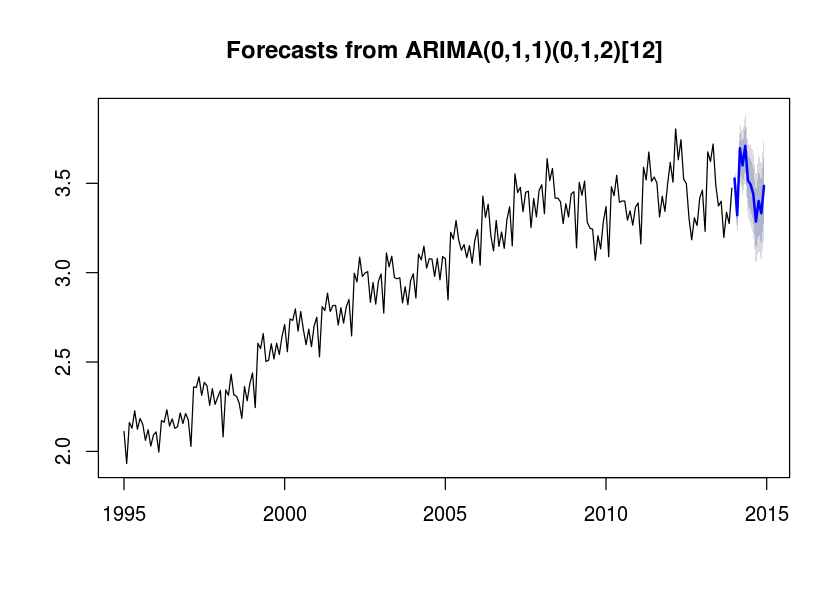

In [189]:
## Make the forecast for the next year
Milk.forecast = forecast(fit.Milk, h=12)
summary(Milk.forecast)
plot(Milk.forecast)

# vvvvvvvvvvvvvvvvvvv JUNK vvvvvvvvvvvvvvvvvvvvvv

## ARIMA, Ice cream

In [151]:
IceCream.arima = ts.model(IceCream.decomp[, 3], 
                              col = 'ARIMA model for Ice Cream', order = c(2,1,2))


Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
          ar1      ar2     ma1      ma2
      -0.7101  -0.0315  0.0355  -0.7303
s.e.   0.1029   0.0960  0.0811   0.0821

sigma^2 estimated as 7.798:  log likelihood = -555.87,  aic = 1121.75


Standard error same order of magnitude as coeffiencts (except for MA2). Try some more.

In [153]:
IceCream.arima = ts.model(IceCream.decomp[, 3], 
                              col = 'ARIMA model for Ice Cream', order = c(2,1,1))


Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
         ar1     ar2      ma1
      0.2361  0.1105  -1.0000
s.e.  0.0664  0.0665   0.0128

sigma^2 estimated as 7.927:  log likelihood = -559.41,  aic = 1126.82


In [154]:
IceCream.arima = ts.model(IceCream.decomp[, 3], 
                              col = 'ARIMA model for Ice Cream', order = c(1,1,2))


Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
          ar1     ma1      ma2
      -0.6947  0.0302  -0.7488
s.e.   0.0905  0.0769   0.0576

sigma^2 estimated as 7.801:  log likelihood = -555.93,  aic = 1119.86


In [155]:
IceCream.arima = ts.model(IceCream.decomp[, 3], 
                              col = 'ARIMA model for Ice Cream', order = c(2,0,2))


Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
         ar1     ar2     ma1      ma2
      0.0698  0.5806  0.2446  -0.5751
s.e.  0.1729  0.1045  0.1835   0.1472

sigma^2 estimated as 7.415:  log likelihood = -552.1,  aic = 1114.19


In [158]:
IceCream.arima = ts.model(IceCream.decomp[, 3], 
                              col = 'ARIMA model for Ice Cream', order = c(1,1,1))


Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
         ar1      ma1
      0.1489  -0.8789
s.e.  0.0912   0.0581

sigma^2 estimated as 8.19:  log likelihood = -561.39,  aic = 1128.77


In [156]:
Milk.arima = ts.model(Milk.decomp[, 3], 
                              col = 'ARIMA model for Milk', order = c(2,1,0))


Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
          ar1     ar2
      -0.1582  0.0323
s.e.   0.0667  0.0672

sigma^2 estimated as 0.002284:  log likelihood = 368.17,  aic = -730.34


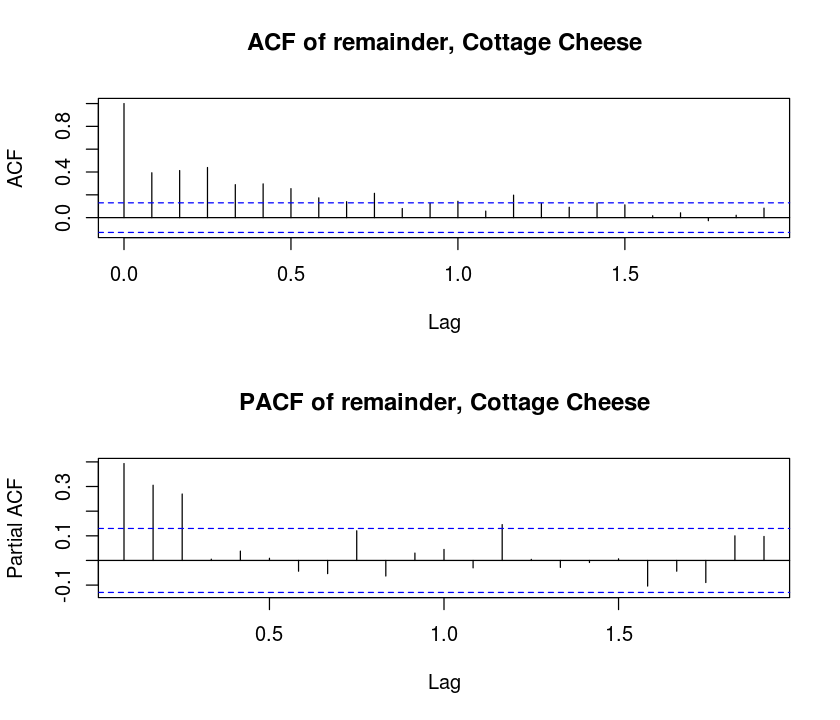

In [131]:
options(repr.pmales.extlot.width=8, repr.plot.height=6)
plot.acf(Cotagecheese.decomp[, 3], col = "remainder, Cottage Cheese", is.df = FALSE)

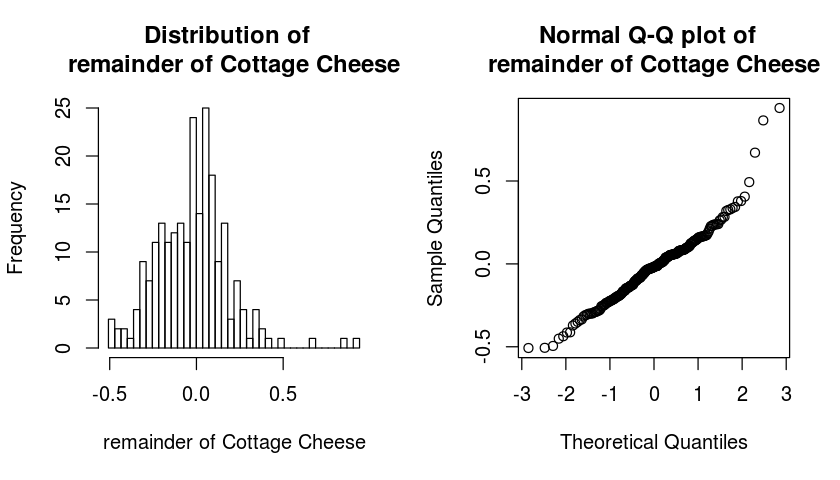

In [132]:
options(repr.pmales.extlot.width=8, repr.plot.height=4)
dist.ts(Cotagecheese.decomp[, 3], col = '\nremainder of Cottage Cheese')

### Summary, Cottage Cheese
- ACF and PACF plots suggest that the remainder series is close to white noise
  - ACF and PACF are strongerst for lag=0.0, but have a several other strong values as wel.
- Distribution of the Cottage Cheese remainder is close to Normal.
  - Q-Q plot is a bit heavy in the tails.
  - Histogram has some heaviness at -0.5 and a few outliers byond +0.5
- **Pretty sure it's stationary**

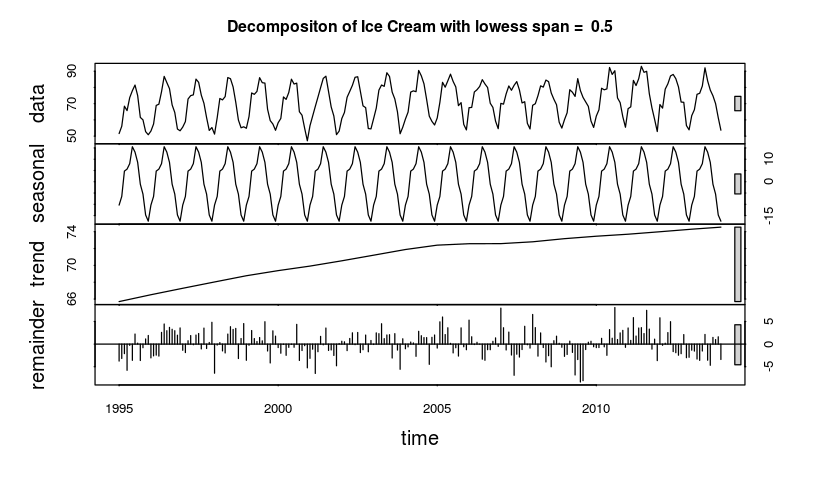

In [133]:
IceCream.decomp = ts.decomp(IceCream.ts, col= "Ice Cream", 
                            Mult = TRUE, is.df = FALSE)

**So that's interesting. The Ice Cream data didn't seem to have an obvious trend when plotted as simple time series, but it jumps right out when you do the stl composition.**

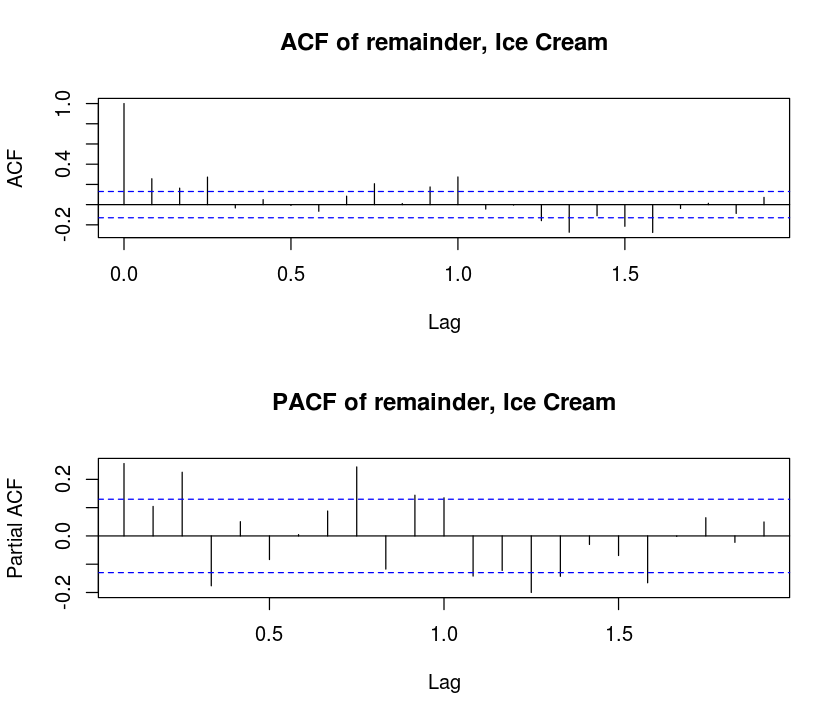

In [134]:
options(repr.pmales.extlot.width=8, repr.plot.height=6)
plot.acf(IceCream.decomp[, 3], col = "remainder, Ice Cream", is.df = FALSE)

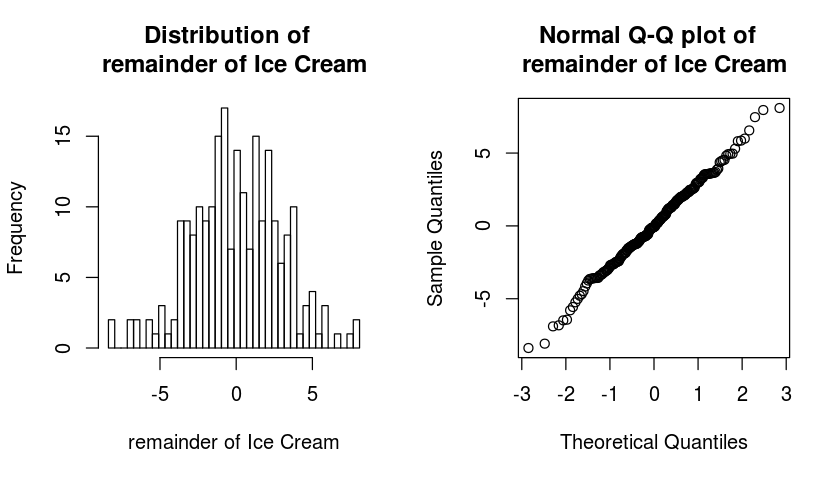

In [135]:
options(repr.pmales.extlot.width=8, repr.plot.height=4)
dist.ts(IceCream.decomp[, 3], col = '\nremainder of Ice Cream')

### Summary, Ice Cream
- ACF and PACF plots verify that the remainder series is very close to white noise
  - ACF shows strong signal for lag=0, very little outside of that.
- Distribution of the Milk remainder is very close to Normal.
  - Well-formed Q-Q plot
  - Well-formed Frequency Histogran
- **Very sure it's stationary**

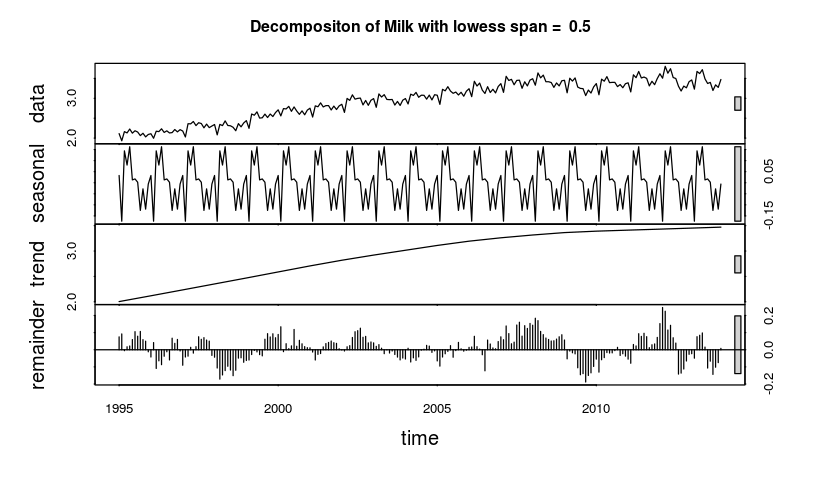

In [136]:
Milk.decomp = ts.decomp(Milk.ts, col= "Milk", 
                        Mult = TRUE, is.df = FALSE)

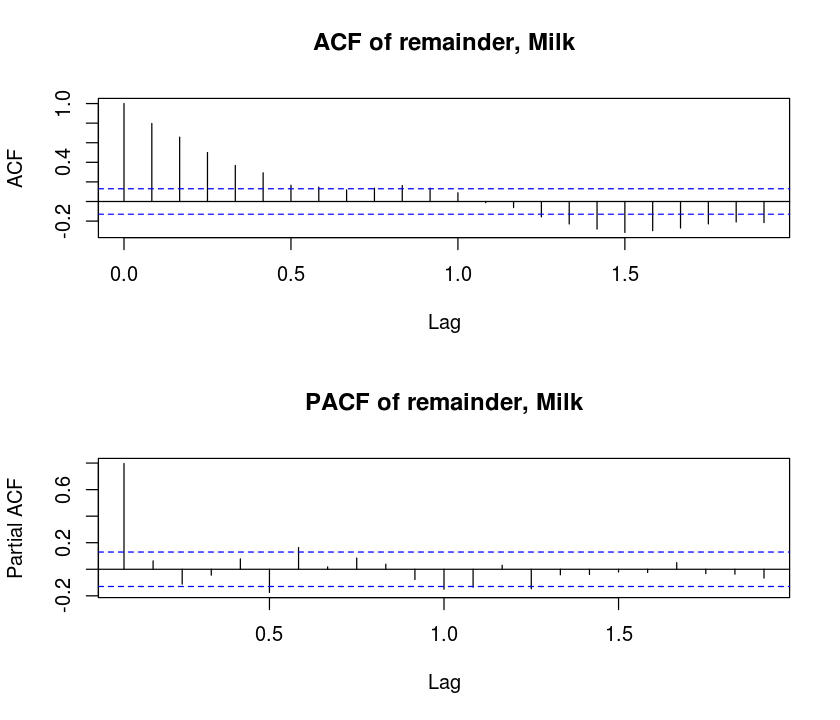

In [137]:
options(repr.pmales.extlot.width=8, repr.plot.height=6)
plot.acf(Milk.decomp[, 3], col = "remainder, Milk", is.df = FALSE)

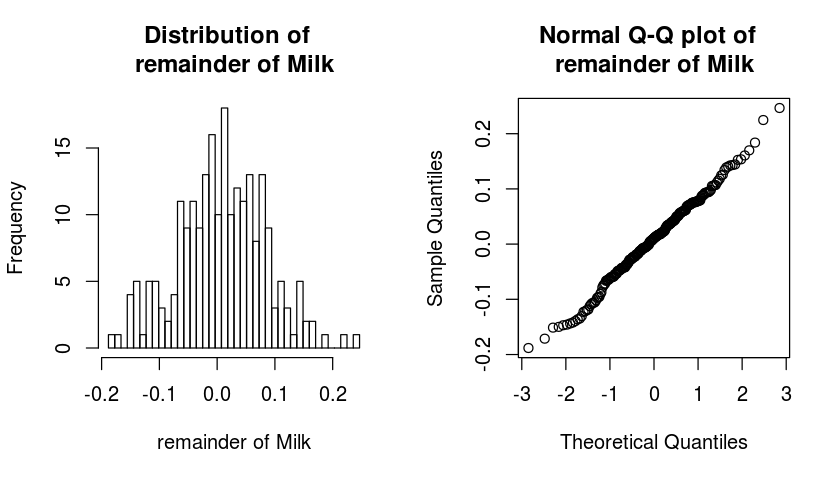

In [138]:
options(repr.pmales.extlot.width=8, repr.plot.height=4)
dist.ts(Milk.decomp[, 3], col = '\nremainder of Milk')

### Summary, Milk
- ACF and PACF plots verify that the remainder series is very close to white noise
  - ACF shows multiple strong decaying signals for lag=0.0-0.4
  - PACF shows strong signal for lag=0.
- Distribution of the MIlk remainder is very close to Normal.
  - Well-formed Q-Q plot
  - Well-formed Frequency Histogran
- **Pretty sure it's not stationary

|Series        |Sationary? |Seasonal? |
|--------------|:---------:|:--------:|
|Cottage Cheese|Pretty Sure|Yes       |
|Ice Cream     |Yes        |Yes       |
|Milk          |No(?)      |Yes       |

# Check for Stationarity ... or Stationaryness ... or something

_A time series with a constant variance is **stationary**. The properties of a stationary time series do not vary with time._

_The distribution of the difference series values are close to Normal. The ACF and PACF plots verify that the difference series is a white noise series. The differencing operator has transformed the non-stationary randowm walk series to a stationary white noise series.
_

Any time series with a trend is **not stationary**.


## Conclusions, Seasonality
- **All three series exhibit seasonality**
- **Seasonality was harder to pick out in the original Milk & Cotage Cheese data; but became more clear upon decomposition**
- **Similarly, the trend in the Ice Cream data was hard to pick out without decomposition.**
- **Seasonal behavior is "smoothest" for Ice Cream**

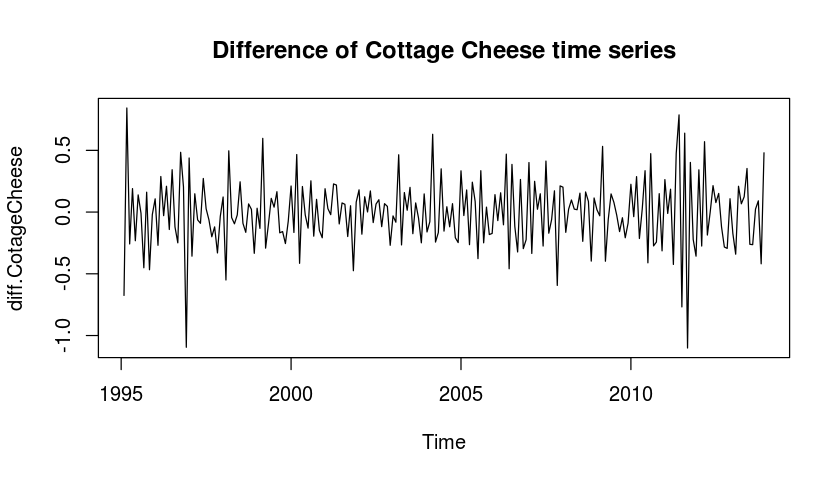

In [139]:
diff.CotageCheese = ts.diff(Cotagecheese.ts)
options(repr.pmales.extlot.width=8, repr.plot.height=4)
plot(diff.CotageCheese, main = 'Difference of Cottage Cheese time series')

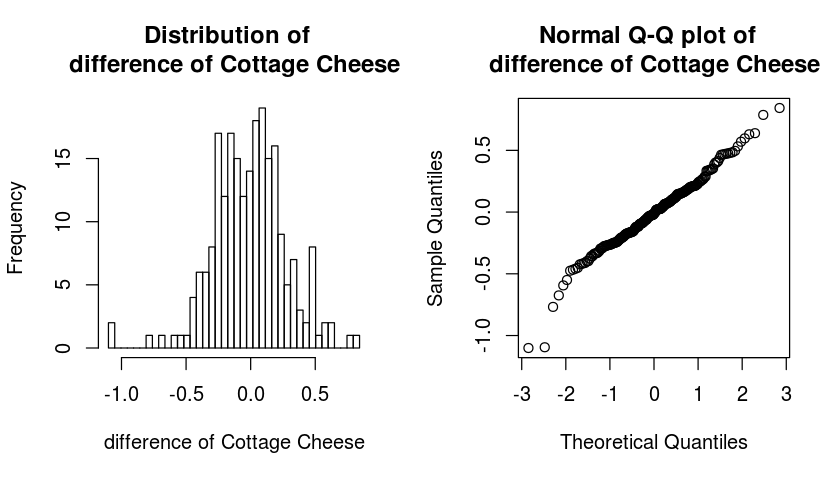

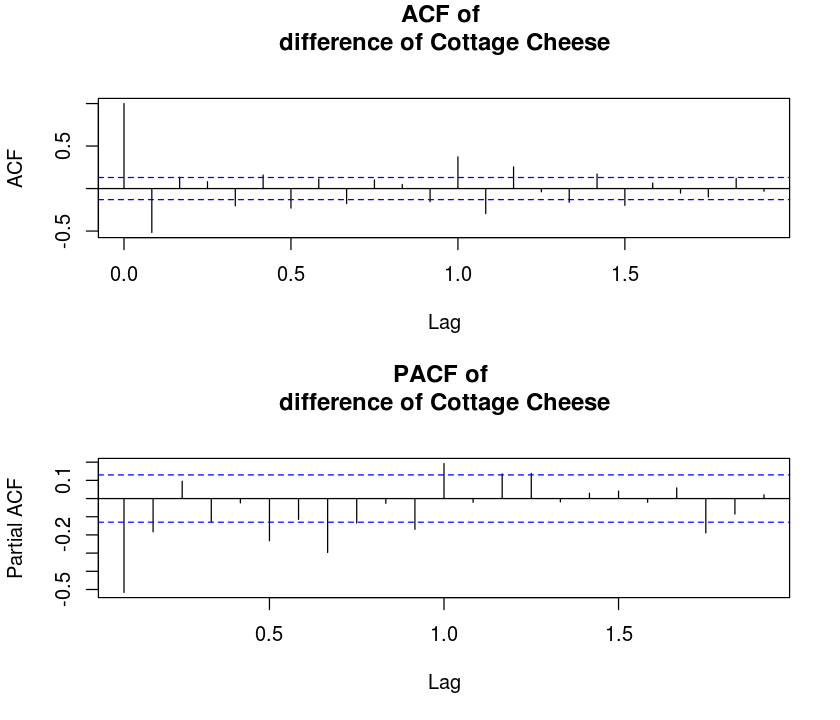

In [140]:
options(repr.pmales.extlot.width=8, repr.plot.height=4)
dist.ts(diff.CotageCheese, col = '\ndifference of Cottage Cheese')
options(repr.pmales.extlot.width=8, repr.plot.height=6)
plot.acf(diff.CotageCheese, col = '\ndifference of Cottage Cheese', is.df = F)

The distribution of the difference series values are close to Normal. The ACF and PACF plots verify that the difference series is a white noise series. The differencing operator has transformed the non-stationary randowm walk series to a stationary white noise series.

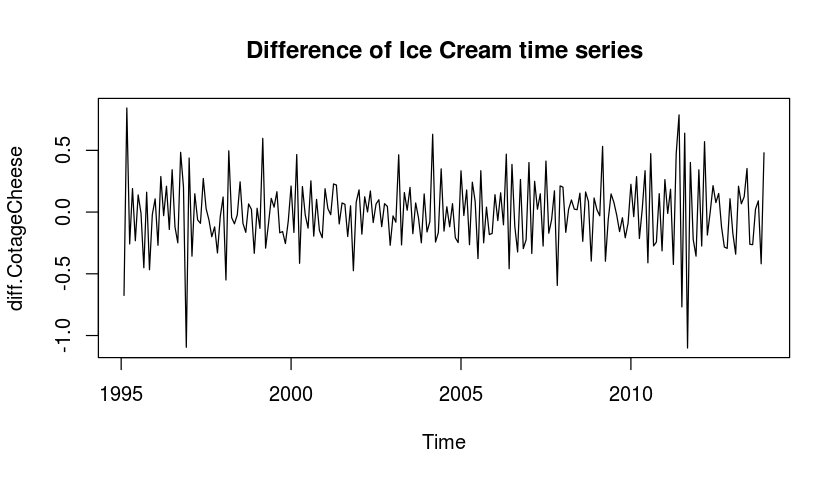

In [141]:
diff.IceCream = ts.diff(IceCream.ts)
options(repr.pmales.extlot.width=8, repr.plot.height=4)
plot(diff.CotageCheese, main = 'Difference of Ice Cream time series')

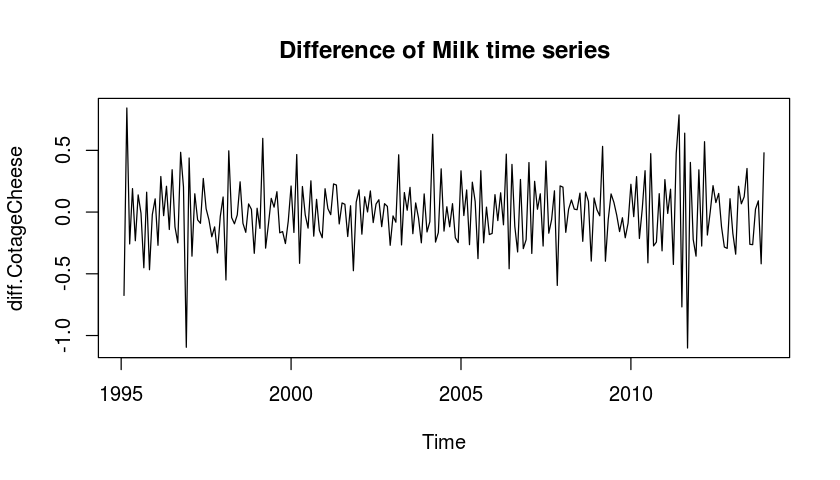

In [142]:
diff.Milk = ts.diff(Milk.ts)
options(repr.pmales.extlot.width=8, repr.plot.height=4)
plot(diff.CotageCheese, main = 'Difference of Milk time series')

# Next Step

# Next Step

# Next Step

# Conclusion